### Pizza Price Pridiction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [3]:
#Model selection
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.svm             import SVC
from xgboost                 import XGBRegressor

#Model evaluation
from sklearn.metrics         import mean_absolute_error,mean_squared_error, accuracy_score,plot_confusion_matrix,classification_report, matthews_corrcoef
from sklearn.metrics         import recall_score,precision_score,f1_score

In [4]:
data=pd.read_csv('./Dataset/pizza_v1.csv')

In [5]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [7]:
data.describe

<bound method NDFrame.describe of     company price_rupiah  diameter      topping           variant     size  \
0         A    Rp235,000      22.0      chicken  double_signature    jumbo   
1         A    Rp198,000      20.0    papperoni  double_signature    jumbo   
2         A    Rp120,000      16.0    mushrooms  double_signature  reguler   
3         A    Rp155,000      14.0  smoked beef  double_signature  reguler   
4         A    Rp248,000      18.0   mozzarella  double_signature    jumbo   
..      ...          ...       ...          ...               ...      ...   
124       E     Rp39,000       8.5         tuna        spicy tuna    small   
125       E     Rp72,000      12.0         tuna        spicy tuna   medium   
126       E     Rp99,000      14.0         tuna        spicy tuna    large   
127       E     Rp44,000       8.5         meat   BBQ_meat_fiesta    small   
128       E     Rp78,000      12.0         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese 

In [8]:
data['price_rupiah']=data['price_rupiah'].apply(lambda x: x.replace('Rp','').replace(',',''))

In [9]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [10]:
data['price_rupiah']=data['price_rupiah'].astype(float)

In [11]:
data['diameter'].unique()

array([22. , 20. , 16. , 14. , 18. , 18.5,  8. , 12. , 16.5,  8.5, 17. ])

In [12]:
data['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [13]:
data['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [14]:
data['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [15]:
data['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [16]:
data['extra_sauce'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
data['extra_cheese'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
LabelEn=LabelEncoder()
cols=['company','topping','variant','size','extra_sauce','extra_cheese']
for col in cols:
    data[col]=LabelEn.fit_transform(data[col])

In [19]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235000.0,22.0,2,8,1,1,1
1,0,198000.0,20.0,7,8,1,1,1
2,0,120000.0,16.0,5,8,4,1,1
3,0,155000.0,14.0,9,8,4,1,0
4,0,248000.0,18.0,4,8,1,1,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   price_rupiah  129 non-null    float64
 2   diameter      129 non-null    float64
 3   topping       129 non-null    int64  
 4   variant       129 non-null    int64  
 5   size          129 non-null    int64  
 6   extra_sauce   129 non-null    int64  
 7   extra_cheese  129 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 8.2 KB


In [21]:
#coefficient of variation

covCompany=((data['company'].std()/data['company'].mean())*100)
print('Coefficient Of Variation Company :', covCompany,'%')
covPrice=((data['price_rupiah'].std()/data['price_rupiah'].mean())*100)
print('Coefficient Of Variation Price :', covPrice,'%')
covDiameter=((data['diameter'].std()/data['diameter'].mean())*100)
print('Coefficient Of Variation Diameter :', covDiameter,'%')
covTopping=((data['topping'].std()/data['topping'].mean())*100)
print('Coefficient Of Variation topping :', covTopping,'%')
covSize=((data['size'].std()/data['size'].mean())*100)
print('Coefficient Of Variation Size :', covSize,'%')
covSauce=((data['extra_sauce'].std()/data['extra_sauce'].mean())*100)
print('Coefficient Of Variation Sauce :', covCompany,'%')
covCheese=((data['extra_cheese'].std()/data['extra_cheese'].mean())*100)
print('Coefficient Of Variation Cheese :', covCheese,'%')

Coefficient Of Variation Company : 70.13795484040163 %
Coefficient Of Variation Price : 51.29719019276373 %
Coefficient Of Variation Diameter : 25.21952768274302 %
Coefficient Of Variation topping : 60.53337574131802 %
Coefficient Of Variation Size : 51.266588560481175 %
Coefficient Of Variation Sauce : 70.13795484040163 %
Coefficient Of Variation Cheese : 70.98635432250336 %


In [22]:
#make a correlation of the data

corr=data.corr()
corr

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
company,1.000000,-0.300033,-0.182710,0.002093,-0.109497,0.021434,-0.038954,0.034503
price_rupiah,-0.300033,1.000000,0.826977,-0.077875,0.130395,-0.551606,0.083859,0.011817
diameter,-0.182710,0.826977,1.000000,-0.178475,0.193343,-0.836722,-0.063957,0.055488
topping,0.002093,-0.077875,-0.178475,1.000000,0.255129,0.145894,0.042505,-0.012019
variant,-0.109497,0.130395,0.193343,0.255129,1.000000,-0.255651,-0.029388,0.268582
size,0.021434,-0.551606,-0.836722,0.145894,-0.255651,1.000000,0.226068,-0.119754
extra_sauce,-0.038954,0.083859,-0.063957,0.042505,-0.029388,0.226068,1.000000,-0.089131
extra_cheese,0.034503,0.011817,0.055488,-0.012019,0.268582,-0.119754,-0.089131,1.000000


### Data Visualization

In [23]:
sns.set_theme(color_codes=True,style='darkgrid',palette='deep',font='sans-serif')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

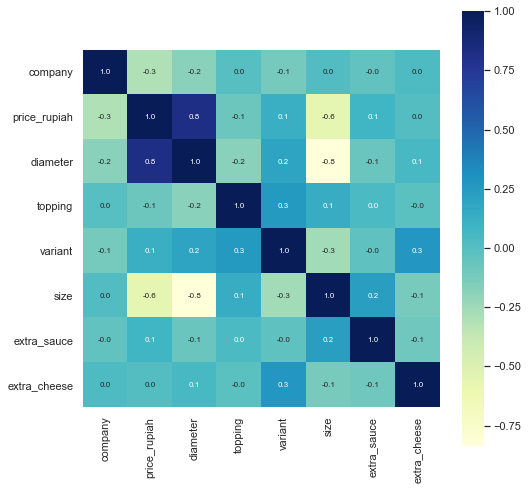

In [24]:
# construct a correlation heatmap 

plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='YlGnBu')
plt.plot

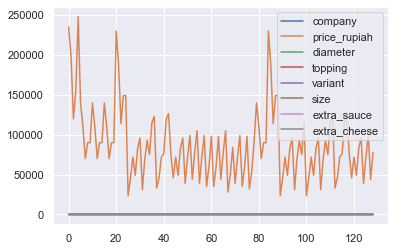

In [25]:
data.plot()
plt.show()

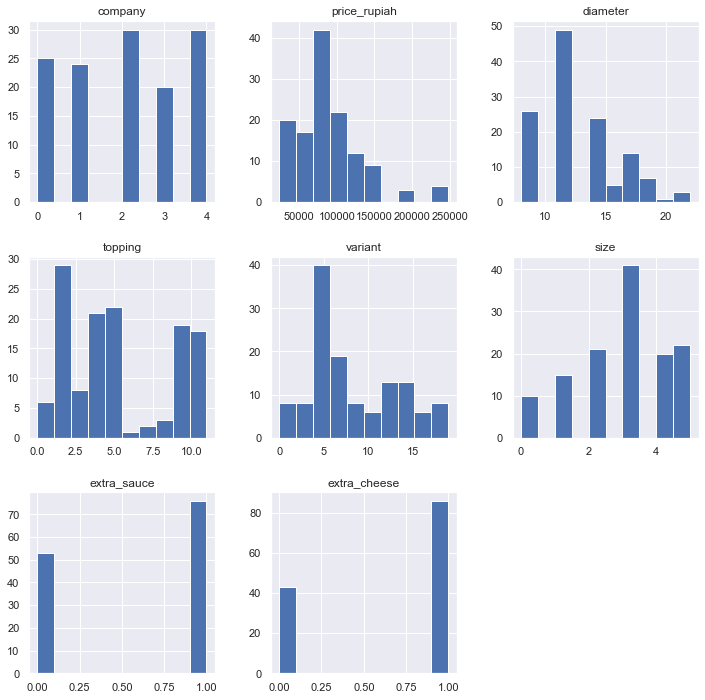

In [26]:
# plot a histgram
data.hist(figsize=(12,12))
plt.show()

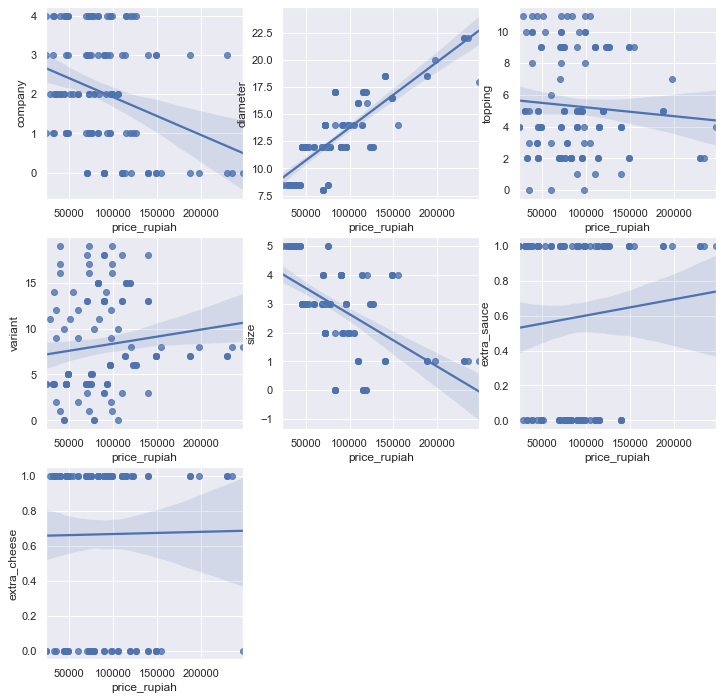

In [27]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.regplot(x=data.price_rupiah,y=data.company,data=data)
plt.subplot(3,3,2)
sns.regplot(x=data.price_rupiah,y=data.diameter,data=data)
plt.subplot(3,3,3)
sns.regplot(x=data.price_rupiah,y=data.topping,data=data)
plt.subplot(3,3,4)
sns.regplot(x=data.price_rupiah,y=data.variant,data=data)
plt.subplot(3,3,5)
sns.regplot(x=data.price_rupiah,y=data['size'],data=data)
plt.subplot(3,3,6)
sns.regplot(x=data.price_rupiah,y=data.extra_sauce,data=data)
plt.subplot(3,3,7)
sns.regplot(x=data.price_rupiah,y=data.extra_cheese,data=data)

plt.show()

In [28]:
data['size']

0      1
1      1
2      4
3      4
4      1
      ..
124    5
125    3
126    2
127    5
128    3
Name: size, Length: 129, dtype: int64

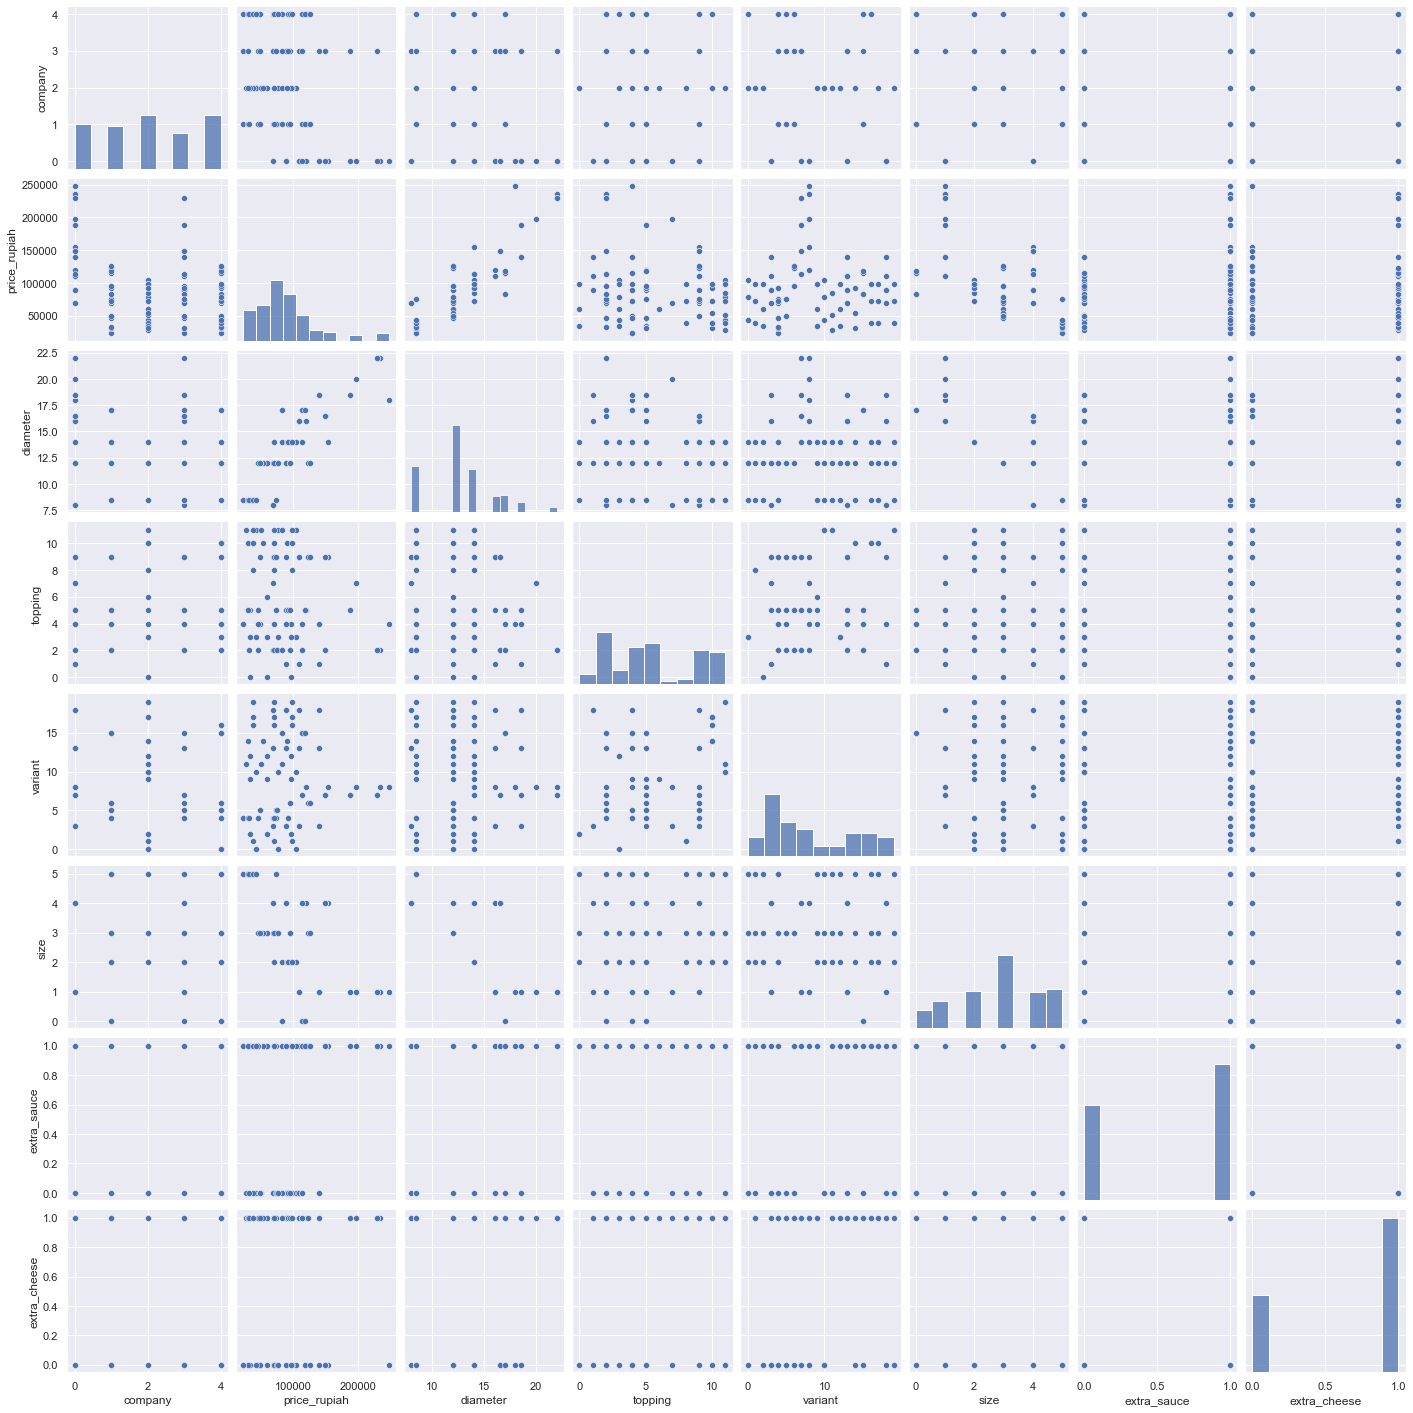

In [27]:
sns.pairplot(data)
plt.show()

### Split the data

In [29]:
X=data.drop(['price_rupiah'],axis=1)
y=data['price_rupiah']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Build the Model

### Model 1: XgBoost

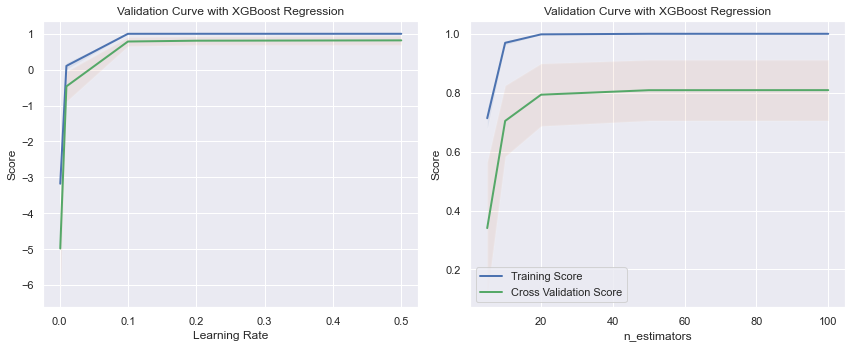

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

# Setting the range for the parameter 
parameter_range = [0.001,0.01,0.1,0.2,0.5]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(XGBRegressor(), X, y,
                                       param_name = 'learning_rate',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with XGBoost Regression")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

plt.subplot(1,2,2)

parameter_range = [5,10,20,50,100]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(XGBRegressor(), X, y,
                                       param_name = 'n_estimators',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with XGBoost Regression")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [32]:
%%time

# define the model 
# various hyper parameters to tune

xgb=XGBRegressor()
parameters={'gamma':[0],
            'learning_rate':[0.001,0.01,0.1],
            'max_depth':[5,6,7],
            'n_estimators':[20,100,1000,1500],
            'n_jobs':[16],
            'objective':['reg:squarederror'],
            'subsample':[0.8],
            'scale_pos_weight':[0],
            'reg_alpha':[0],
            'reg_lambda':[1],
            'booster':['gbtree']}

xgb_grid=GridSearchCV(xgb,
                      parameters,
                      cv=5,
                      verbose=True)

#fit the model
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8860240931973788
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1500, 'n_jobs': 16, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0, 'subsample': 0.8}
CPU times: user 4min 59s, sys: 17min 44s, total: 22min 43s
Wall time: 3min 18s


In [33]:
model =  xgb_grid.best_estimator_
# predict X_train
y_predict_train = xgb_grid.best_estimator_.predict(X_train)
# predict X_test
y_predict_test = xgb_grid.best_estimator_.predict(X_test)

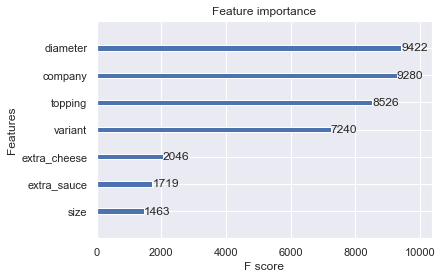

In [34]:
import xgboost as xgb
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [6, 5]
plt.show()

In [35]:
from sklearn import metrics

# Train X

# R squared
TrainRsquared = metrics.r2_score(y_train,y_predict_train)
print('R-Squared:', TrainRsquared)

# Mean Absolute Error
TrainMAE = metrics.mean_absolute_error(y_train,y_predict_train)
print('MAE:', TrainMAE)

# Mean Squared Error
TrainMSE = metrics.mean_squared_error(y_train,y_predict_train)
print('MSE:', TrainMSE)

# Root Mean Squared Error
TrainRMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))
print('RMSE:', TrainRMSE)

# Median
TrainMe = metrics.median_absolute_error(y_train,y_predict_train)
print('Median:', TrainMe)

R-Squared: 0.999999999999235
MAE: 0.02988470873786408
MSE: 0.0014253634850955703
RMSE: 0.03775398634708089
Median: 0.0234375


In [36]:
# Test X

# R squared
TestRsquared = metrics.r2_score(y_test,y_predict_test)
print('R-Squared:', TestRsquared)

# Mean Absolute Error
TestMAE = metrics.mean_absolute_error(y_test,y_predict_test)
print('MAE:', TestMAE)

# Mean Squared Error
TestMSE = metrics.mean_squared_error(y_test,y_predict_test)
print('MSE:', TestMSE)

# Root Mean Squared Error

TestRMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict_test))
print('RMSE:', TestRMSE)

# Median
TestMe = metrics.median_absolute_error(y_test,y_predict_test)
print('Median:', TestMe)

R-Squared: 0.9550962381136796
MAE: 5876.0305739182695
MSE: 109270664.12945102
RMSE: 10453.260932811876
Median: 2865.71875


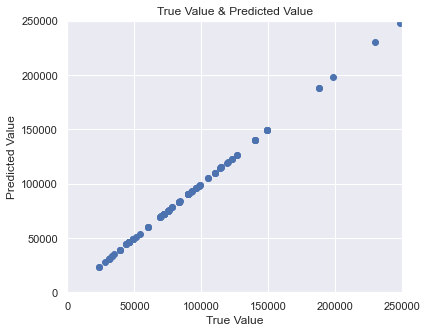

In [37]:
# plot train predicted value & true value

plt.scatter(y_train, y_predict_train)
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 250000)
plt.ylim(0,250000)
plt.show()

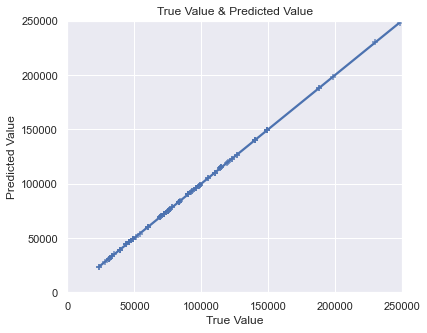

In [38]:
sns.regplot(x=y_train, y=y_predict_train, marker='+')
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 250000)
plt.ylim(0,250000)
plt.show()

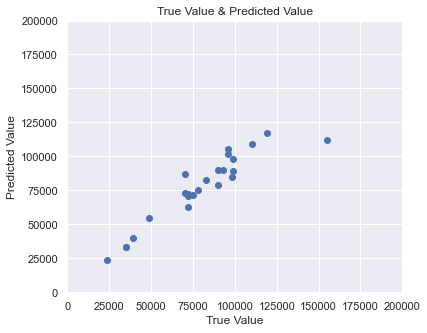

In [39]:
# plot test predicted value & true value

plt.scatter(y_test, y_predict_test)
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 200000)
plt.ylim(0,200000)
plt.show()

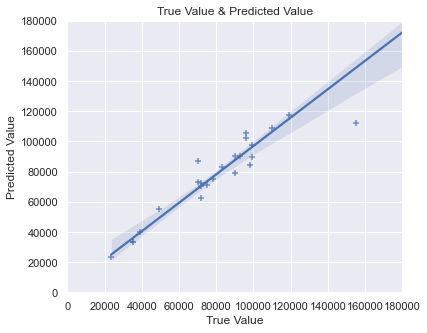

In [40]:
sns.regplot(x=y_test, y=y_predict_test, marker='+')
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 180000)
plt.ylim(0, 180000)
plt.show()

### Model 2: KNN Regression

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scale the data to (0,1)
scaler1 = MinMaxScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.fit_transform(X_test)

scaler2 = StandardScaler()
X_train_normalized = scaler2.fit_transform(X_train)
X_test_normalized = scaler2.fit_transform(X_test)

<Figure size 360x288 with 0 Axes>

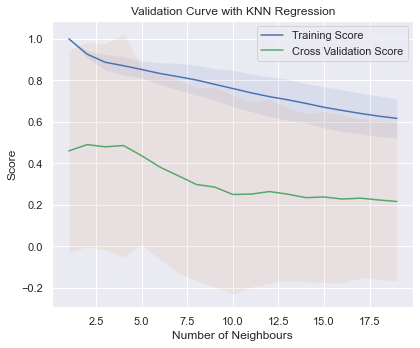

In [42]:
plt.figure(figsize=(5,4))
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 20, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsRegressor(), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.figure(figsize=(6,5))
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1)
 
# Creating the plot
plt.title("Validation Curve with KNN Regression")
plt.xlabel("Number of Neighbours")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [43]:
%%time

from sklearn import neighbors
from math import sqrt

# error rate for different k values

train_rmse_val = []
test_rmse_val = []
for k in range(20):
    k+=1
    KNNmodel = neighbors.KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(X_train,y_train)
    test_predict = KNNmodel.predict(X_test)
    train_predict = KNNmodel.predict(X_train)
    test_error=sqrt(metrics.mean_squared_error(y_test,test_predict))
    train_error=sqrt(metrics.mean_squared_error(y_train,train_predict))
    train_rmse_val.append(train_error)
    test_rmse_val.append(test_error)
    print('Train RMSE value for k=', k, 'is:', train_error)
    print('Test RMSE value for k=', k, 'is:', test_error)

Train RMSE value for k= 1 is: 0.0
Test RMSE value for k= 1 is: 21475.388417728507
Train RMSE value for k= 2 is: 11292.906313686868
Test RMSE value for k= 2 is: 17652.49492063592
Train RMSE value for k= 3 is: 14830.524078549766
Test RMSE value for k= 3 is: 17147.23819679944
Train RMSE value for k= 4 is: 15052.471936787226
Test RMSE value for k= 4 is: 18880.761983482633
Train RMSE value for k= 5 is: 16456.615513973622
Test RMSE value for k= 5 is: 20252.2268481195
Train RMSE value for k= 6 is: 17544.27478324205
Test RMSE value for k= 6 is: 22124.906441445917
Train RMSE value for k= 7 is: 19106.36024425473
Test RMSE value for k= 7 is: 22976.76459264874
Train RMSE value for k= 8 is: 19439.150571445254
Test RMSE value for k= 8 is: 24176.540450880828
Train RMSE value for k= 9 is: 20296.779972163156
Test RMSE value for k= 9 is: 25335.83311628229
Train RMSE value for k= 10 is: 20914.25571788319
Test RMSE value for k= 10 is: 26377.186384041448
Train RMSE value for k= 11 is: 22111.61943852178
Tes

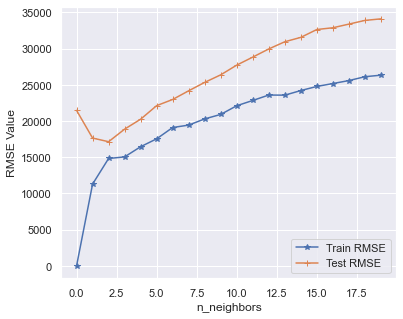

In [44]:
plt.figure(figsize=(6,5))
train_rmse_curve = pd.DataFrame(train_rmse_val)
test_rmse_curve = pd.DataFrame(test_rmse_val)
plt.plot(train_rmse_curve,marker='*')
plt.plot(test_rmse_curve,marker='+')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE Value')
plt.legend(['Train RMSE','Test RMSE'],loc='lower right')
plt.show()


In [45]:
%%time

knn_r_acc=[]
for i in range(20):
    i+=1
    knn=neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    knn_r_acc.append((i,train_score,test_score))
df=pd.DataFrame(knn_r_acc,columns=['k','Train Score','Test Score'])
print(df)


     k  Train Score  Test Score
0    1     1.000000    0.810477
1    2     0.931546    0.871947
2    3     0.881941    0.879172
3    4     0.878381    0.853507
4    5     0.854633    0.831452
5    6     0.834783    0.798840
6    7     0.804052    0.783051
7    8     0.797167    0.759803
8    9     0.778874    0.736215
9   10     0.765215    0.714086
10  11     0.737562    0.684266
11  12     0.719981    0.658579
12  13     0.701316    0.631350
13  14     0.701752    0.606520
14  15     0.685430    0.590974
15  16     0.670511    0.562374
16  17     0.659778    0.555874
17  18     0.648623    0.542139
18  19     0.633881    0.528058
19  20     0.627849    0.522038
CPU times: user 100 ms, sys: 2.88 ms, total: 103 ms
Wall time: 101 ms


In [46]:
knn=neighbors.KNeighborsRegressor(n_neighbors=5)

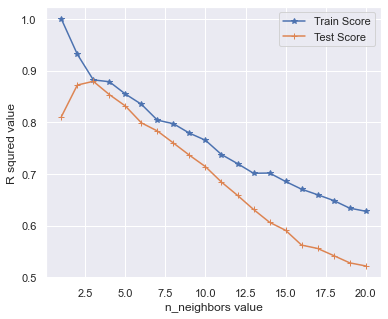

In [47]:
plt.figure(figsize=(6,5))
plt.plot(df['k'],df['Train Score'],marker='*')
plt.plot(df['k'],df['Test Score'],marker='+')
plt.xlabel('n_neighbors value')
plt.ylabel('R squred value')
plt.legend(['Train Score','Test Score'],loc='upper right')
plt.show()

### Model 3: Decision Tree

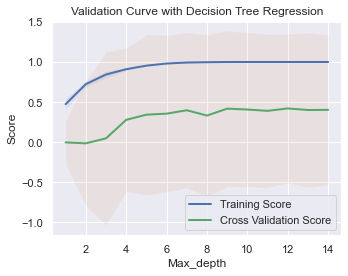

In [48]:
plt.figure(figsize=(5,4))

parameter_range = np.arange(1,15,1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(DecisionTreeRegressor(), X, y,
                                       param_name = 'max_depth',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Regression")
plt.xlabel("Max_depth")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'lower right')
plt.show()

In [49]:
%%time
from sklearn import tree

dtr_score_val=[]
for depth in range(15):
    depth+=1
    dtr=tree.DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train,y_train)
    dtr_train_score=dtr.score(X_train,y_train)
    dtr_test_score=dtr.score(X_test,y_test)
    dtr_score_val.append((depth,dtr_train_score,dtr_test_score))
dtr_df=pd.DataFrame(dtr_score_val, columns=['Max_depth','Train Score','Test Score'])
print(dtr_df)


    Max_depth  Train Score  Test Score
0           1     0.467890    0.356633
1           2     0.703528    0.740930
2           3     0.839210    0.844733
3           4     0.929977    0.907626
4           5     0.962083    0.959991
5           6     0.984918    0.965800
6           7     0.992633    0.949387
7           8     0.995854    0.953674
8           9     0.999977    0.972684
9          10     1.000000    0.958953
10         11     1.000000    0.969334
11         12     1.000000    0.951556
12         13     1.000000    0.956219
13         14     1.000000    0.960724
14         15     1.000000    0.963063
CPU times: user 72.2 ms, sys: 2.88 ms, total: 75.1 ms
Wall time: 72.6 ms


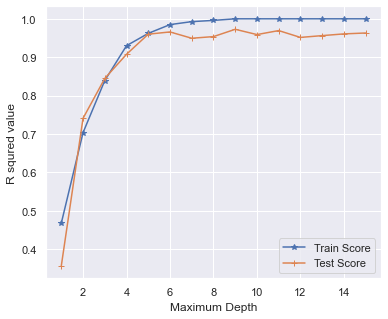

In [50]:
plt.figure(figsize=(6,5))
plt.plot(dtr_df['Max_depth'],dtr_df['Train Score'],marker='*')
plt.plot(dtr_df['Max_depth'],dtr_df['Test Score'],marker='+')
plt.xlabel('Maximum Depth')
plt.ylabel('R squred value')
plt.legend(['Train Score','Test Score'],loc='lower right')
plt.show()

In [51]:
dtree=tree.DecisionTreeRegressor(max_depth=6)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [52]:
dot_data = \
    tree.export_graphviz(
        dtree,
        out_file = None,
        feature_names = ['company','diameter','topping','variant','size','extra_sauce','extra_cheese'],
        filled = True,
        impurity = False,
        rounded = True
    )

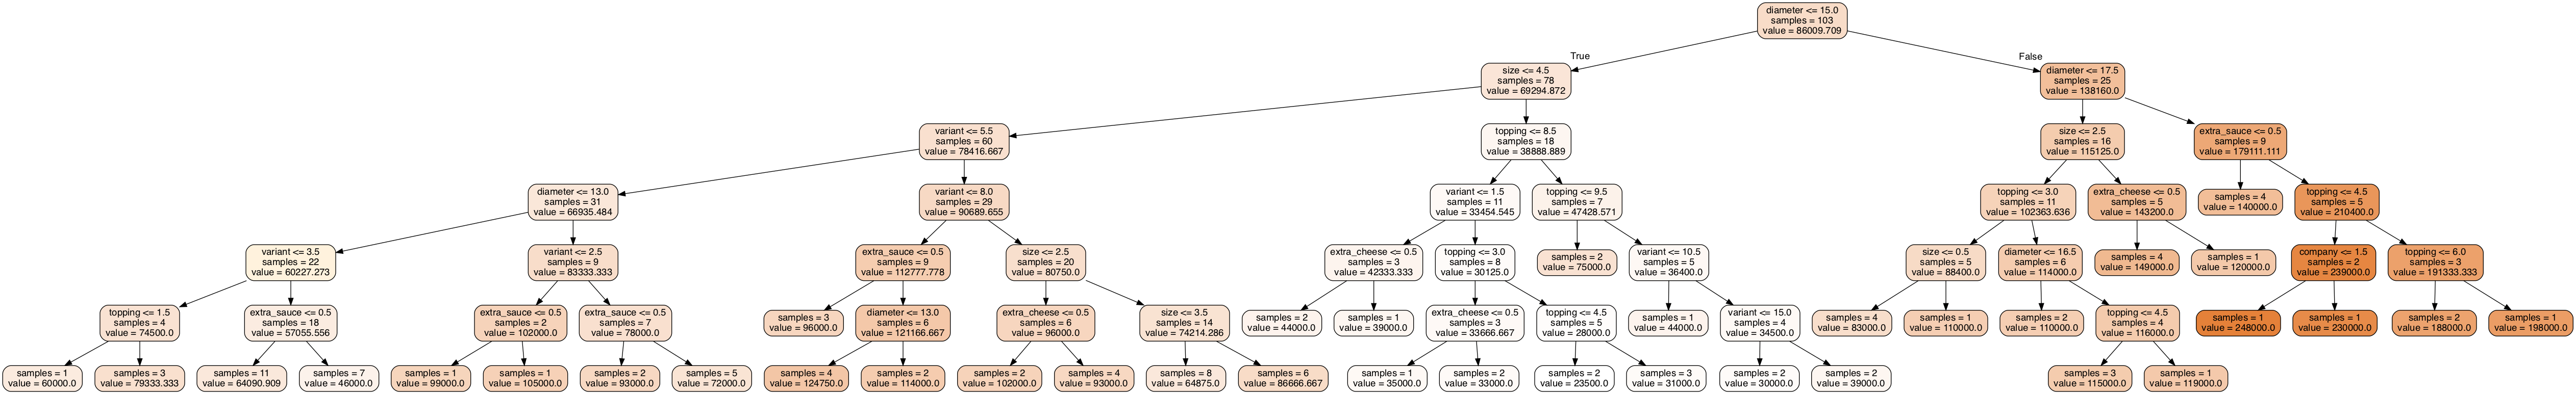

In [53]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[6].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [54]:
import graphviz

In [55]:
tmp=graph.create_png()

In [56]:
graph.write_png("dtr_white_background.png")

True

### Model 4: SVR

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


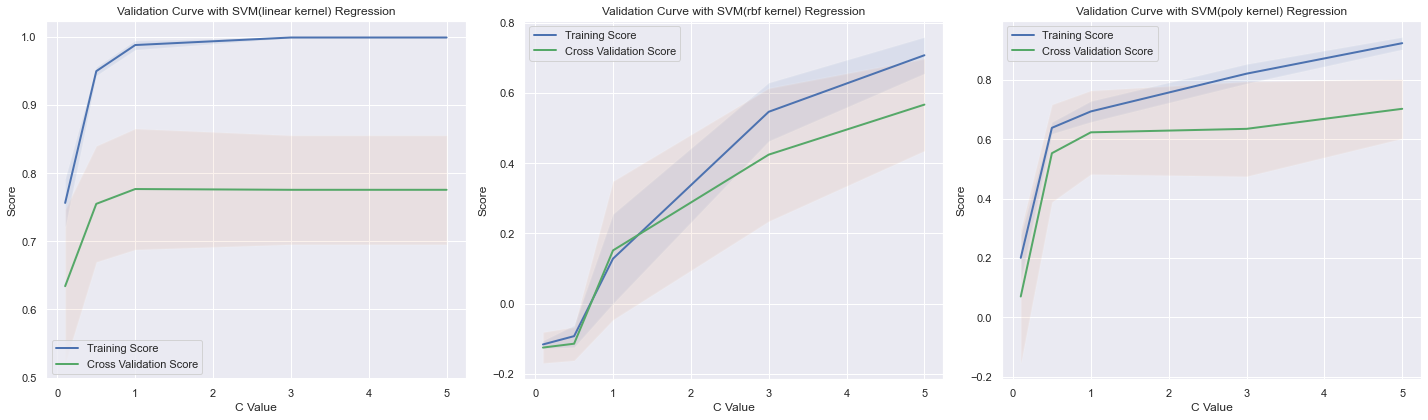

In [57]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)

# Setting the range for the parameter 
parameter_range = [0.1,0.5,1,3,5]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(kernel='linear'), X, y,
                                       param_name = 'C',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)

plt.title("Validation Curve with SVM(linear kernel) Regression")
plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend(loc = 'best')

plt.subplot(1,3,2) 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(kernel='rbf'), X, y,
                                       param_name = 'C',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with SVM(rbf kernel) Regression")
plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend(loc = 'best')

plt.subplot(1,3,3) 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(kernel='poly'), X, y,
                                       param_name = 'C',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with SVM(poly kernel) Regression")
plt.xlabel("C Value")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


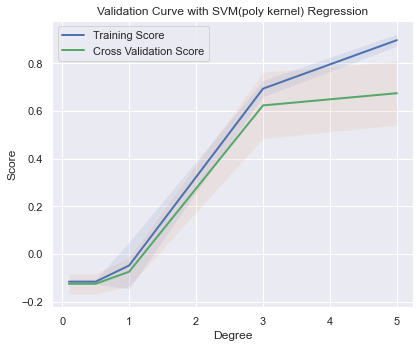

In [58]:
plt.figure(figsize=(6,5))
 
train_score, test_score = validation_curve(SVC(kernel='poly'), X, y,
                                       param_name = 'degree',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with SVM(poly kernel) Regression")
plt.xlabel("Degree")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [59]:
%%time
from sklearn.svm import LinearSVR,SVR
from sklearn.metrics import mean_squared_error

svr=SVR()
parameters={'kernel':['poly','rbf','linear'],
           'degree':[2,3,4,5],
           'C':[0.1,0.5,1,5],
            'gamma':['auto'],
           'epsilon':[0.001,0.01,0.1],
           'max_iter':[20000]}

svr_grid=GridSearchCV(svr,
                      parameters,
                      cv=5,
                      verbose=True)

#fit the model
svr_grid.fit(X_train,y_train)

print(svr_grid.best_score_)
print(svr_grid.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

0.7317901661008585
{'C': 0.5, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 20000}
CPU times: user 3.31 s, sys: 15.5 ms, total: 3.32 s
Wall time: 3.31 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [60]:
svr_model =  svr_grid.best_estimator_
# predict X_train
y_predict_train = svr_grid.best_estimator_.predict(X_train)
# predict X_test
y_predict_test = svr_grid.best_estimator_.predict(X_test)

svr_train_accuracy=svr_model.score(X_train,y_train)
svr_test_accuracy=svr_model.score(X_test,y_test)

svr_train_rmse=np.sqrt(mean_squared_error(y_train,y_predict_train))
svr_test_rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))

print('Training accuracy is :', svr_train_accuracy)
print('Test accuracy is :', svr_test_accuracy)
print('Training RMSE is :', svr_train_rmse)
print('Test RMSE is :', svr_test_rmse)

Training accuracy is : 0.7595677546104735
Test accuracy is : 0.8585939931848111
Training RMSE is : 21164.299770870934
Test RMSE is : 18550.018939627655


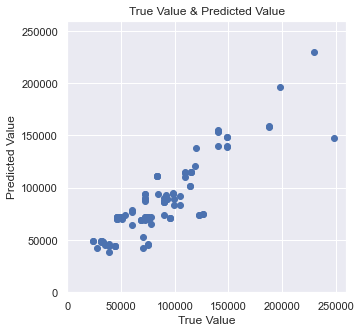

In [61]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_predict_train)
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 260000)
plt.ylim(0, 260000)
plt.show()

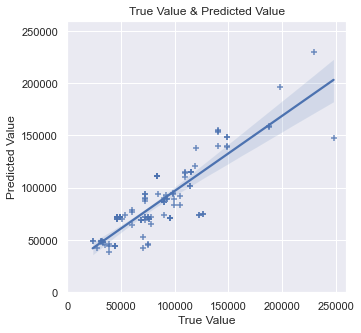

In [62]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_train, y=y_predict_train, marker='+')
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 260000)
plt.ylim(0,260000)
plt.show()

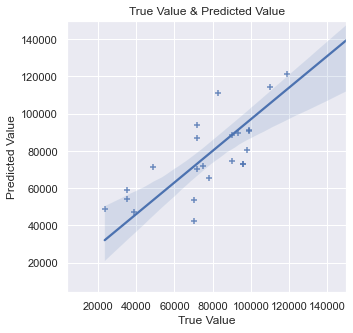

In [63]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_test, y=y_predict_test, marker='+')
plt.title('True Value & Predicted Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.xlim(4000, 150000)
plt.ylim(4000, 150000)
plt.show()

### Model 5: Neural Network (MLP)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

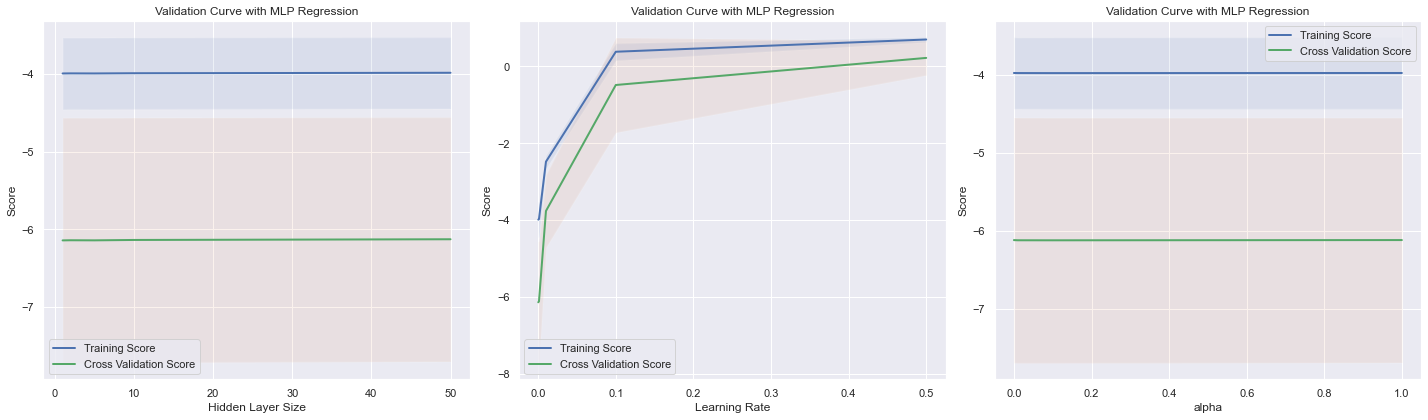

In [64]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)

parameter_range = [1,2,5,10,50]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(MLPRegressor(), X, y,
                                       param_name = 'hidden_layer_sizes',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with MLP Regression")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend(loc = 'lower left')

plt.subplot(1,3,2)

parameter_range = [0.0001,0.001,0.01,0.1,0.5]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(MLPRegressor(), X, y,
                                       param_name = 'learning_rate_init',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)

plt.title("Validation Curve with MLP Regression")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.legend(loc = 'best')

plt.subplot(1,3,3)

parameter_range = [0.00001,0.0001,0.001,0.01,0.1,1]
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(MLPRegressor(), X, y,
                                       param_name = 'alpha',
                                       param_range = parameter_range,
                                        cv = 5, scoring = "r2")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

lw=2
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b',lw=lw)
plt.fill_between(parameter_range,mean_train_score - std_train_score,
                 mean_train_score+std_train_score,alpha=0.1,lw=lw)
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g',lw=lw)
plt.fill_between(parameter_range,mean_test_score-std_test_score,
                mean_test_score+std_test_score,alpha=0.1,lw=lw)
 
# Creating the plot
plt.title("Validation Curve with MLP Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [65]:
%%time
from sklearn.neural_network  import MLPRegressor

mlp_model=MLPRegressor(random_state=1,hidden_layer_sizes=500,learning_rate_init=0.001,max_iter=100000)
mlp_model.fit(X_train,y_train)

mlp_train_predict=mlp_model.predict(X_train)
mlp_test_predict=mlp_model.predict(X_test)

mlp_train_accuracy=mlp_model.score(X_train,y_train)
mlp_test_accuracy=mlp_model.score(X_test,y_test)

mlp_train_rmse=np.sqrt(mean_squared_error(y_train,mlp_train_predict))
mlp_test_rmse=np.sqrt(mean_squared_error(y_test,mlp_test_predict))

print('Training accuracy is :', mlp_train_accuracy)
print('Test accuracy is :', mlp_test_accuracy)
print('Training RMSE is :', mlp_train_rmse)
print('Test RMSE is :', mlp_test_rmse)


Training accuracy is : 0.9668910381011514
Test accuracy is : 0.863725180030893
Training RMSE is : 7853.808906699338
Test RMSE is : 18210.347640654738
CPU times: user 6min 49s, sys: 1min 21s, total: 8min 10s
Wall time: 1min 5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
loss=mlp_model.loss_curve_

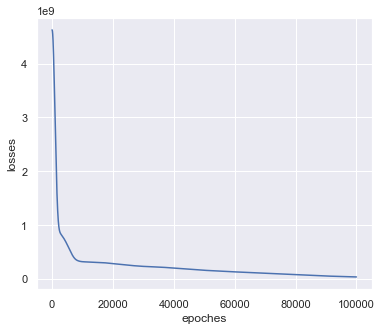

In [67]:
plt.figure(figsize=(6,5))
plt.plot(loss)
plt.xlabel('epoches')
plt.ylabel('losses')
plt.show()

In [68]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_ne

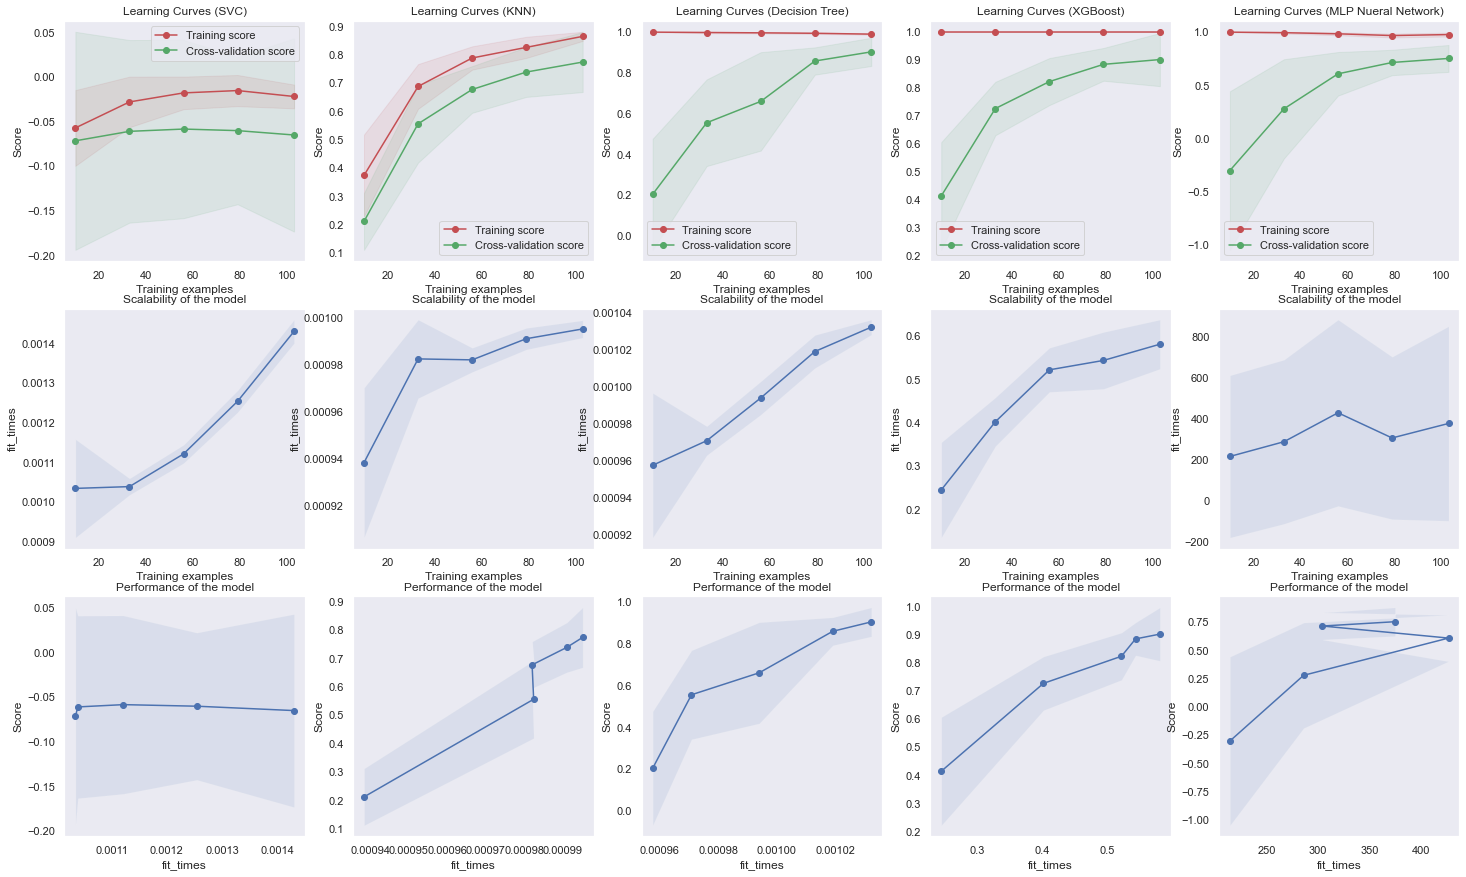

In [76]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))


title = "Learning Curves (SVC)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = SVR(C=1,degree=3,kernel='poly',max_iter=20000,epsilon=0.1)
plot_learning_curve(estimator, title, X, y, axes=axes[:,0], cv=cv)

title= 'Learning Curves (KNN)'
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
estimator = KNeighborsRegressor(n_neighbors=5)
plot_learning_curve(estimator,title,X,y,axes=axes[:,1],cv=cv)

title= 'Learning Curves (Decision Tree)'
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
estimator = DecisionTreeRegressor(max_depth=7)
plot_learning_curve(estimator,title,X,y,axes=axes[:,2],cv=cv)

title= 'Learning Curves (XGBoost)'
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
estimator = XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=1200)
plot_learning_curve(estimator,title,X,y,axes=axes[:,3],cv=cv)

title= 'Learning Curves (MLP Nueral Network)'
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
estimator = MLPRegressor(max_iter=100000,hidden_layer_sizes=500)
plot_learning_curve(estimator,title,X,y,axes=axes[:,4],cv=cv)

plt.show()